## Atividade

### Corr_Clustermap_Regplot_log_Rank

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_previsao_renda = pd.read_csv('Profissão- Cientista de Dados_M10_support material.csv').drop(['Unnamed: 0','mau','index','data_ref'], axis=1).dropna().drop_duplicates().reset_index(drop = True)

df_previsao_renda.tipo_residencia = df_previsao_renda.tipo_residencia.astype('category')
df_previsao_renda.estado_civil = df_previsao_renda.estado_civil.astype('category')
df_previsao_renda.tempo_emprego = df_previsao_renda.tempo_emprego.astype('int64')
df_previsao_renda.tipo_renda = df_previsao_renda.tipo_renda.astype('category')
df_previsao_renda.educacao = df_previsao_renda.educacao.astype('category')


df_previsao_renda.head(2)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3,3.0,3369.24
1,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0,2.0,6096.14


Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

   
    RESPOSTA
   
    --> A qtd_filhos E A qt_pessoas_residencia MASTRAM UMA BOA CORRELAÇÃO EM FUNÇÃO DA RENDA
    --> A idade	POR qtd_filhos É A PIOR CORRELAÇÃO DO GRAFICO
    --> AS PESSOAS DO SEXO FEMINIO PARECEM TER MAIS TEMPO DE EMPREGO
    --> AS PESSOAS DO SEXO MASCULINO PARECEM TER MAIS IDADE 
    --> AS PESSOAS COM TEMPO DE EMPREGO ENTRE 10 - 30 GANHAM ENTRE 15000 - 45000
    --> AS PESSOAS COM IDADE ENTRE 20 - 60 GANHAM ENTRE 15000 - 45000
    

In [3]:

df_previsao_renda.corr()


,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
posse_de_veiculo,1.000000,-0.000923,0.085228,-0.101271,-0.091151,0.127793,0.033327
posse_de_imovel,-0.000923,1.000000,0.022690,0.080048,-0.000690,0.013866,0.028380
qtd_filhos,0.085228,0.022690,1.000000,-0.298469,-0.073994,0.906652,-0.018920
idade,-0.101271,0.080048,-0.298469,1.000000,0.321873,-0.266595,0.151138
tempo_emprego,-0.091151,-0.000690,-0.073994,0.321873,1.000000,-0.065040,0.402231
qt_pessoas_residencia,0.127793,0.013866,0.906652,-0.266595,-0.065040,1.000000,-0.009074
renda,0.033327,0.028380,-0.018920,0.151138,0.402231,-0.009074,1.000000


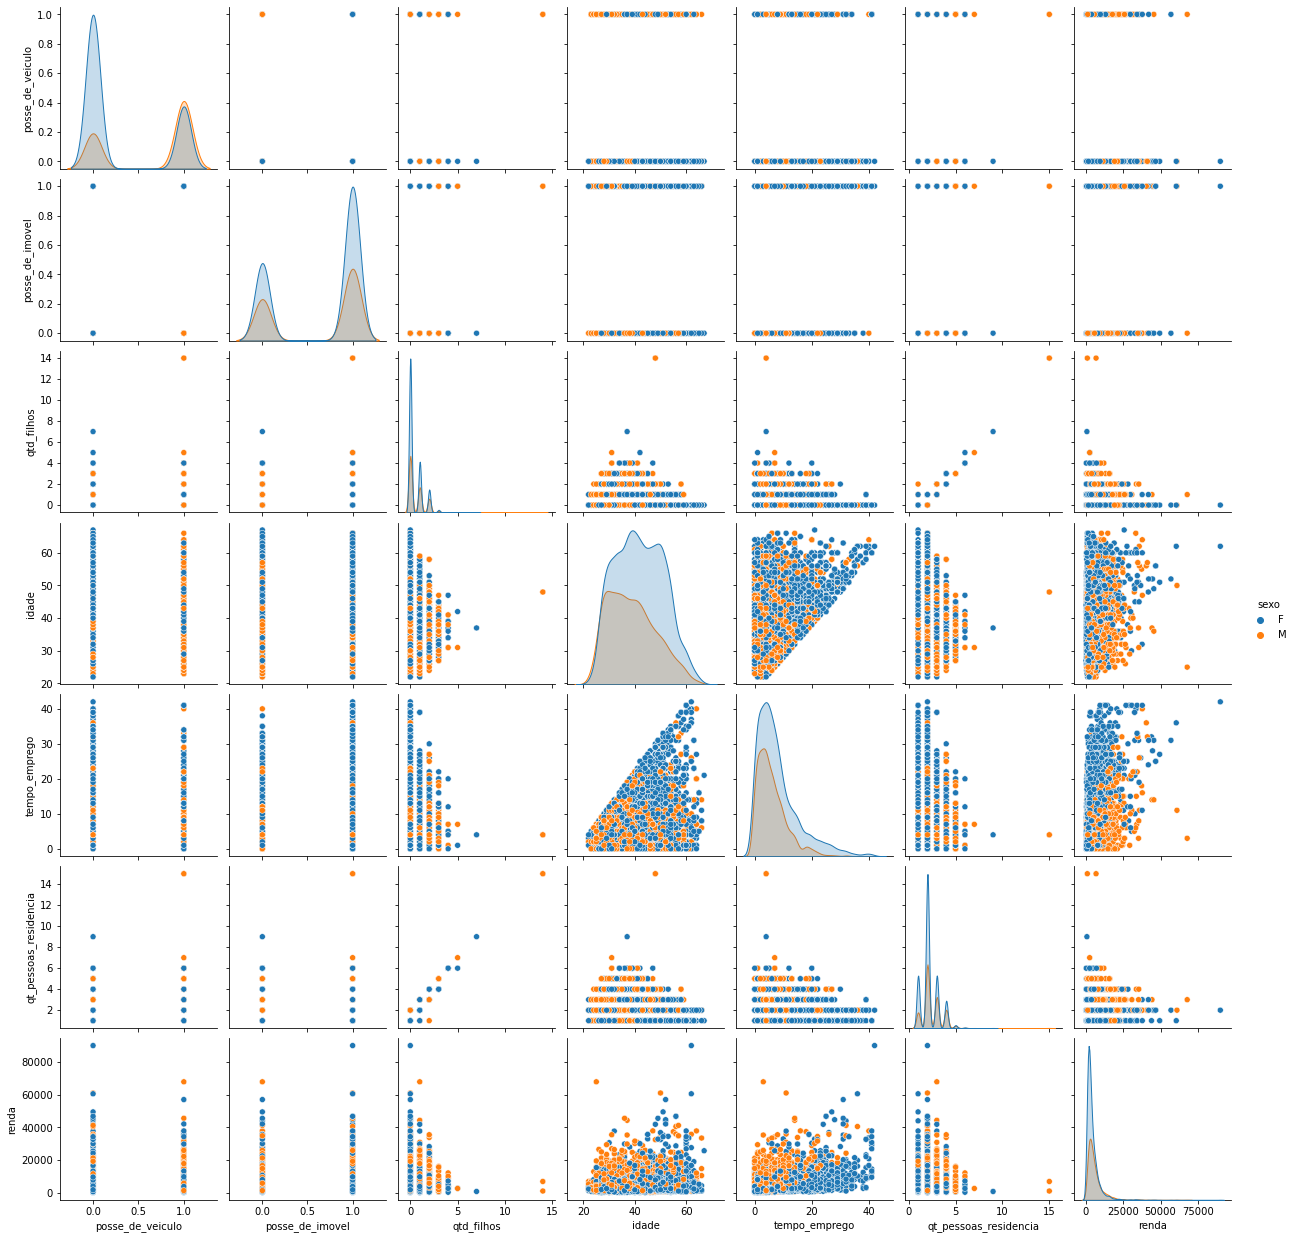

In [4]:

sns.pairplot(df_previsao_renda, hue = 'sexo');


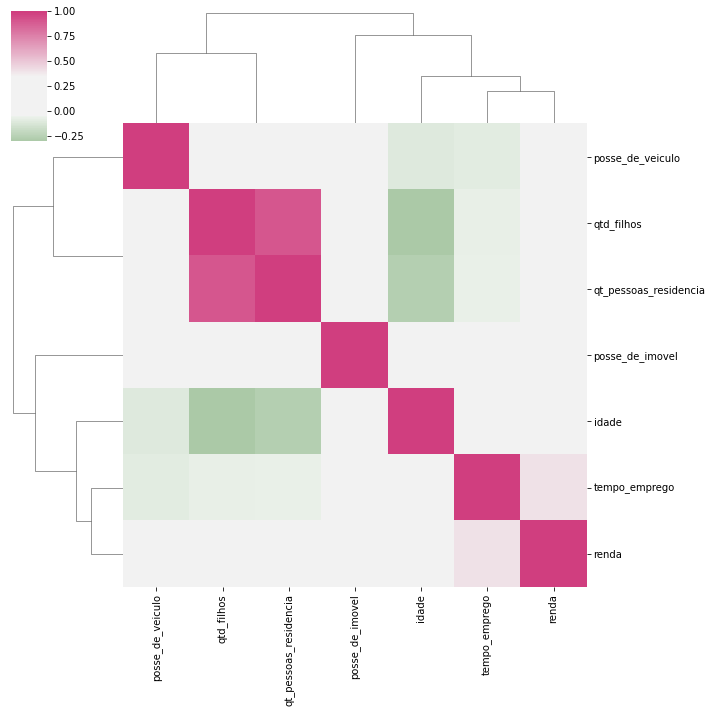

In [5]:

cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df_previsao_renda.corr(), figsize=(10, 10), center = 0.15, cmap=cmap, metric="correlation");


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [6]:

df_scatterplot = df_previsao_renda[['idade','tempo_emprego','renda']]

df_scatterplot


,idade,tempo_emprego,renda
0,36,3,3369.24
1,42,0,6096.14
2,31,8,5658.98
3,50,1,7246.69
4,52,13,4017.37
...,...,...,...
8699,37,8,3883.98
8700,43,4,1367.87
8701,54,7,9645.79
8702,50,1,1852.11


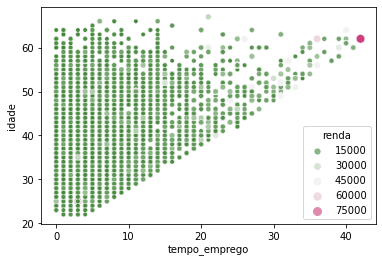

In [7]:

sns.scatterplot(x ='tempo_emprego', y='idade' ,data = df_scatterplot, hue = 'renda', size ='renda', 
                palette=cmap, alpha = 'auto' );


3) Na su aopinião, há outliers na variável renda?

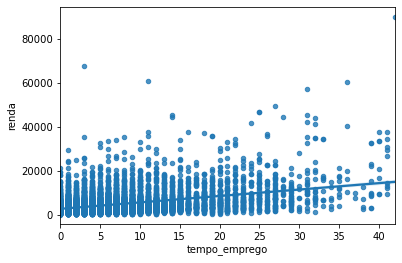

In [8]:

sns.regplot(x='tempo_emprego', y='renda', data =df_scatterplot,scatter_kws={'s':20});


4) Calcule o logaritmo da variável renda e repita a sequência de análise

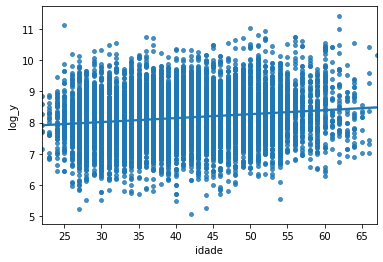

In [10]:
# idade x log_y

df_log = df_scatterplot.copy()

df_log['log_y'] = np.log(df_log['renda'])

log_sns = sns.regplot(x='idade', y='log_y', data = df_log, scatter_kws={'s':15})


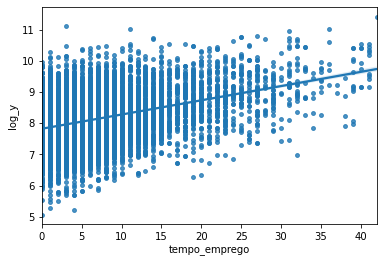

In [11]:
# tempo_emprego x log_y

log_sns = sns.regplot(x='tempo_emprego', y='log_y',  data = df_log, scatter_kws={'s':15})


In [12]:

df_log.corr()


,idade,tempo_emprego,renda,log_y
idade,1.000000,0.321873,0.151138,0.147469
tempo_emprego,0.321873,1.000000,0.402231,0.382749
renda,0.151138,0.402231,1.000000,0.832653
log_y,0.147469,0.382749,0.832653,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
# tomando como base a Matriz de correlação(df_log): Piorou

,idade,tempo_emprego,renda,idade_rank,tempo_emprego_rank,renda_rank
idade,1.000000,0.321873,0.151138,0.992879,0.250555,0.135563
tempo_emprego,0.321873,1.000000,0.402231,0.319726,0.887025,0.357120
renda,0.151138,0.402231,1.000000,0.143453,0.306579,0.751830
idade_rank,0.992879,0.319726,0.143453,1.000000,0.253849,0.133118
tempo_emprego_rank,0.250555,0.887025,0.306579,0.253849,1.000000,0.326354
renda_rank,0.135563,0.357120,0.751830,0.133118,0.326354,1.000000


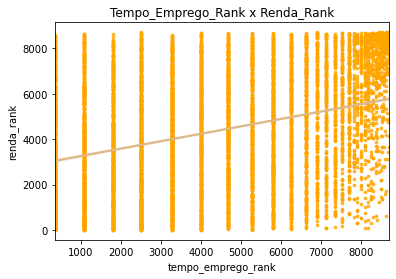

In [13]:
# Usnado o Rank para o calculo da Correlação

# Correlação e grafico_Rank -->  Tempo_Emprego_Rank x Renda_Rank

df_rank = pd.concat([df_scatterplot,df_scatterplot.rank()], axis = 1)

df_rank.columns = ['idade','tempo_emprego','renda','idade_rank','tempo_emprego_rank', 'renda_rank']

df_grafico_rank= sns.regplot(x='tempo_emprego_rank',y='renda_rank', data = df_rank, scatter_kws={"color": 'orange','s':7}, 
                             line_kws={"color": "burlywood"})

plt.title('Tempo_Emprego_Rank x Renda_Rank')

df_rank.corr()


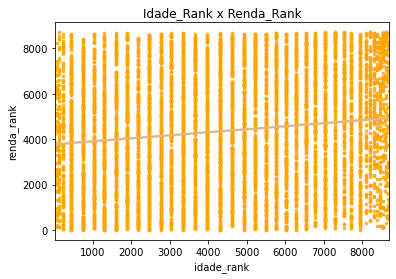

In [14]:
# Grafico_Rank -->  Idade_Rank x Renda_Rank

df_grafico_rank= sns.regplot(x='idade_rank',y='renda_rank', data = df_rank, scatter_kws={"color": 'orange','s':7}, 
                             line_kws={"color": "burlywood"}).set(title='Idade_Rank x Renda_Rank')
